#     Title:                           Customer Data Pre-processing 

### Course: 771768 - Introduction to Programming for Artificial Intelligence 
###                                 and Data Science(Python)

### Importing the libraries

In [123]:
import csv
import json
from json import JSONEncoder
import os
import sys
import re
from datetime import datetime
import datetime
from contextlib import suppress
from dateutil import parser
import pandas as pd
import numpy
import statistics
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(color_codes=True)
from collections import OrderedDict
from itertools import islice

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

print("Setup Complete")

Setup Complete


### Data Processing

## 1. 

    Read in the ACW Data from CSV library.

In [16]:
with open("acw_user_data.csv", 'rt') as csv_file:
    csv_reader = csv.DictReader(csv_file, delimiter=",") # Source: python software foundation, 2021, https://docs.python.org/3/library/csv.html
    for row in csv_reader:
        print(row)
        pass
    #print(f'Header: {csv_reader.fieldnames}')

{'Address Street': '70 Lydia isle', 'Address City': 'Lake Conor', 'Address Postcode': 'S71 7XZ', 'Age (Years)': '89', 'Distance Commuted to Work (miles)': '0', 'Employer Company': 'N/A', 'Credit Card Start Date': '08/18', 'Credit Card Expiry Date': '11/27', 'Credit Card Number': '676373692463', 'Credit Card CVV': '875', 'Dependants': '3', 'First Name': 'Kieran', 'Bank IBAN': 'GB62PQKB71416034141571', 'Last Name': 'Wilson', 'Marital Status': 'married or civil partner', 'Yearly Pension (Â£)': '7257', 'Retired': 'True', 'Yearly Salary (Â£)': '72838', 'Sex': 'Male', 'Vehicle Make': 'Hyundai', 'Vehicle Model': 'Bonneville', 'Vehicle Year': '2009', 'Vehicle Type': 'Pickup'}
{'Address Street': '00 Wheeler wells', 'Address City': 'Chapmanton', 'Address Postcode': 'L2 7BT', 'Age (Years)': '46', 'Distance Commuted to Work (miles)': '13.72', 'Employer Company': 'Begum-Williams', 'Credit Card Start Date': '08/12', 'Credit Card Expiry Date': '11/26', 'Credit Card Number': '4529436854129855', 'Credi

## 2. 

    A. Combining Vehicle observations: make, model, year, and type.

In [26]:
Vehicle = []
with open("acw_user_data.csv") as txtfile:
    csv_reader = csv.reader(txtfile)
    header = next(csv_reader)
    
    for line_num, line in enumerate(csv_reader):
        Vehicle.append(f"'Vehicle Make': {line[19]}, 'Vehicle Model': {line[20]}, 'Vehicle Year': {line[21]}, 'Vehicle Type': {line[22]}")
    print(Vehicle)

["'Vehicle Make': Hyundai, 'Vehicle Model': Bonneville, 'Vehicle Year': 2009, 'Vehicle Type': Pickup", "'Vehicle Make': Nissan, 'Vehicle Model': ATS, 'Vehicle Year': 1996, 'Vehicle Type': Coupe", "'Vehicle Make': GMC, 'Vehicle Model': Achieva, 'Vehicle Year': 2015, 'Vehicle Type': Convertible, Coupe", "'Vehicle Make': Scion, 'Vehicle Model': F150 SuperCrew Cab, 'Vehicle Year': 1994, 'Vehicle Type': Pickup", "'Vehicle Make': Buick, 'Vehicle Model': Outback, 'Vehicle Year': 2020, 'Vehicle Type': SUV", "'Vehicle Make': Lexus, 'Vehicle Model': Paceman, 'Vehicle Year': 2004, 'Vehicle Type': Van/Minivan", "'Vehicle Make': Lexus, 'Vehicle Model': S-Series, 'Vehicle Year': 1998, 'Vehicle Type': Van/Minivan", "'Vehicle Make': Volvo, 'Vehicle Model': Express 3500 Passenger, 'Vehicle Year': 2013, 'Vehicle Type': SUV", "'Vehicle Make': Volkswagen, 'Vehicle Model': Town & Country, 'Vehicle Year': 2010, 'Vehicle Type': Sedan, Coupe, Hatchback", "'Vehicle Make': Dodge, 'Vehicle Model': Impreza, 'Vehi

    B. Combining Credit Card observations: start date, end date, card number, security code, and IBAN.

In [8]:
Credit_Card = []
with open("acw_user_data.csv") as txtfile:
    csv_reader = csv.reader(txtfile)
    header = next(csv_reader)
    
    for linenum, line in enumerate(csv_reader):
        Credit_Card.append({'Start Date': line[6], 'End Date': line[7], 'Card Number': line[8], 'CCV': line[9], 'IBAN': line[12]})
print(Credit_Card)

[{'Start Date': '08/18', 'End Date': '11/27', 'Card Number': '676373692463', 'CCV': '875', 'IBAN': 'GB62PQKB71416034141571'}, {'Start Date': '08/12', 'End Date': '11/26', 'Card Number': '4529436854129855', 'CCV': '583', 'IBAN': 'GB37UMCO54540228728019'}, {'Start Date': '11/19', 'End Date': '07/27', 'Card Number': '4091726363083888495', 'CCV': '422', 'IBAN': 'GB40CVUE84011545859591'}, {'Start Date': '10/17', 'End Date': '04/18', 'Card Number': '4671332769487632633', 'CCV': '669', 'IBAN': 'GB40YPKK71613332239280'}, {'Start Date': '04/19', 'End Date': '11/27', 'Card Number': '2245094149128526', 'CCV': '659', 'IBAN': 'GB95WAYW31715898077181'}, {'Start Date': '03/15', 'End Date': '05/15', 'Card Number': '4485214746578045493', 'CCV': '123', 'IBAN': 'GB29SSDY05529526374313'}, {'Start Date': '07/12', 'End Date': '03/29', 'Card Number': '36970652008212', 'CCV': '622', 'IBAN': 'GB92PWOB18937027850061'}, {'Start Date': '07/15', 'End Date': '04/27', 'Card Number': '213199489183130', 'CCV': '389', 

    C. Combining address attributes: main address, city, and postcode.

In [25]:
Address = []
with open("acw_user_data.csv") as txtfile:
    csv_reader = csv.reader(txtfile)
    header = next(csv_reader)
    
    for line_num, line in enumerate(csv_reader):
        Address.append(f"'Street:' {line[0]}, 'City:' {line[1]}, 'PostCode:' {line[2]}")
    print(Address)

["'Street:' 70 Lydia isle, 'City:' Lake Conor, 'PostCode:' S71 7XZ", "'Street:' 00 Wheeler wells, 'City:' Chapmanton, 'PostCode:' L2 7BT", "'Street:' Studio 33K Joel walk, 'City:' Randallborough, 'PostCode:' ME3N 1GH", "'Street:' Studio 46S Bethany lights, 'City:' East Reece, 'PostCode:' E10 9RJ", "'Street:' Flat 3 Christine views, 'City:' Fletcherstad, 'PostCode:' WS2 9SN", "'Street:' Studio 43M Emily rapid, 'City:' West Derekborough, 'PostCode:' W1J 0DL", "'Street:' 24 Heather locks, 'City:' New Mathew, 'PostCode:' WD10 1LX", "'Street:' 81 Goodwin dam, 'City:' Griffinstad, 'PostCode:' G3 7ZX", "'Street:' 798 Yates crescent, 'City:' Port Lisa, 'PostCode:' LS0M 7UU", "'Street:' Studio 77c Gail tunnel, 'City:' Garyberg, 'PostCode:' S7W 4DW", "'Street:' 2 Robert squares, 'City:' North Martyn, 'PostCode:' LN2 4JH", "'Street:' 6 Frances flats, 'City:' Lake Amberchester, 'PostCode:' NE5E 5AD", "'Street:' Flat 29 Liam greens, 'City:' West Liamview, 'PostCode:' S78 9WZ", "'Street:' Studio 75 

## 3.

    a. Casting all lists into respective Data Types[Last question from 2 is executed here].
    b. Cleaning Dependants column and appending problematic rows for dependants to a list.
    c. Drafting all list of dictionaries into a single dictionary.
    d. Appending all list of dictionaries to a list called FinalList.

In [45]:
finalList = []
cast_dependant = []
with open ('acw_user_data.csv', mode ='r') as customers:
    csv_reader = csv.reader(customers)
    header= next(csv_reader)
    
    # Identifying and replacing empty strings with zeros(0) in Dependants
    for linenum, line in enumerate(csv_reader):
        if line[10] == ' ' or line[10]== '':
            # Appending problematic rows to a list.
            cast_dependant.append(linenum)
            line[10] = 0
            
        #  Placing all lists into a dictionary structure called customerDict
        customerDict = {'First Name': line[11], 'Last Name': line[13], 'Age': int(line[3]), 'Sex': line[18], 'Retired': line[16], 'Marital Status': line[14], 'Dependant': int(line[10]), 'Salary': float(line[17]), 'Pension': float(line[15]), 'Employer':line[5], 'Commute distance':float(line[4]), 'Vehicle': Vehicle[linenum], 'Credit Card': Credit_Card[linenum], 'Address': Address[linenum] }
        finalList.append(customerDict)
    #print(finalList)

    
    # The code below prints problematic rows for dependants
    print(f"\nProblematic rows for dependants:{cast_dependant}")


Problematic rows for dependants:[21, 109, 179, 205, 270, 272, 274, 358, 460, 468, 579, 636, 679, 725, 822, 865, 917, 931, 983]


## 4.

    a. Write records to a JSON file, processed.json

In [44]:
with open ('processed.json', mode='w') as processedrecs:
    json.dump(finalList, processedrecs)

## 5.

    A. Extract the Retired and Employed fields from the csv file

In [119]:
retired = []
employed = []

with open ('acw_user_data.csv', mode ='r') as customers:
    csv_reader = csv.reader(customers)
    header= next(csv_reader)

    for linenum, line in enumerate(csv_reader):
        if line[10] == ' ' or line[10]== '':
            cast_dependant.append(linenum)
            line[10] = 0
            
        if line[16].lower() == "true":
            retired_Customer = {'First Name': line[11], 'Last Name': line[13], 'Age': int(line[3]), 'Sex': line[18], 'Retired': line[16], 'Marital Status': line[14], 'Dependant': int(line[10]), 'Salary': float(line[17]), 'Pension': float(line[15]), 'Employer':line[5], 'Commute distance':float(line[4]), 'Vehicle': Vehicle[linenum], 'Credit Card': Credit_Card[linenum], 'Address': Address[linenum] }
            retired.append(retired_Customer)
            
        else:
            employed_Customer = {'First Name': line[11], 'Last Name': line[13], 'Age': int(line[3]), 'Sex': line[18], 'Retired': line[16], 'Marital Status': line[14], 'Dependant': int(line[10]), 'Salary': float(line[17]), 'Pension': float(line[15]), 'Employer':line[5], 'Commute distance':float(line[4]), 'Vehicle': Vehicle[linenum], 'Credit Card': Credit_Card[linenum], 'Address': Address[linenum] }
            employed.append(employed_Customer)
            
    #checking to confirm the total retired plus employed against the total length of data
    print(f"Retired Customer Data: \n\n {retired}\n\n\n")
    print(f" Employed Customer Data: \n\n {employed}")

Retired Customer Data: 

 [{'First Name': 'Kieran', 'Last Name': 'Wilson', 'Age': 89, 'Sex': 'Male', 'Retired': 'True', 'Marital Status': 'married or civil partner', 'Dependant': 3, 'Salary': 72838.0, 'Pension': 7257.0, 'Employer': 'N/A', 'Commute distance': 0.0, 'Vehicle': "'Make': Hyundai, 'Model': Bonneville, 'Year': 2009, 'Type': Pickup", 'Credit Card': {'Start Date': '08/18', 'End Date': '11/27', 'Card Number': '676373692463', 'CCV': '875', 'IBAN': 'GB62PQKB71416034141571'}, 'Address': "'Street:' 70 Lydia isle, 'City:' Lake Conor, 'PostCode:' S71 7XZ"}, {'First Name': 'Clive', 'Last Name': 'Evans', 'Age': 67, 'Sex': 'Male', 'Retired': 'True', 'Marital Status': 'single', 'Dependant': 1, 'Salary': 27964.0, 'Pension': 28075.0, 'Employer': 'N/A', 'Commute distance': 0.0, 'Vehicle': "'Make': Volvo, 'Model': Express 3500 Passenger, 'Year': 2013, 'Type': SUV", 'Credit Card': {'Start Date': '07/15', 'End Date': '04/27', 'Card Number': '213199489183130', 'CCV': '389', 'IBAN': 'GB04VSAZ6912

    B. A function to write json file to working directory

In [120]:
def open_files(mylist, name=""):
    with open (name, mode='w') as processedrecs:
        json.dump(mylist, processedrecs)

    C.Creating JSON files for Retired and Employed columns using the write(open_files) function created.

In [121]:
open_files(employed,'Employed.json')

In [122]:
open_files(retired,'Retired.json')

## 6.

    A function to flag customer(s):
    a. With more than 10 years between their credit card start and end date, 
    b. Move to a seperate file, 
    c. Convert to a JSON file, and
    d. Store in the working directory as remove_ccard

In [81]:
#I formatted my date and created a seperate credit card start date and end date and added it to my structure as new columns to do my calculation and then sort the data
startDateList = []
endDateList = []
remove_ccard = []
date_list = []
  
def check_date():
    with open ('acw_user_data.csv', mode ='r') as customers:
        csv_reader = csv.reader(customers)
        header= next(csv_reader)

        for linenum, line in enumerate(csv_reader):
            if line[10] == ' ' or line[10]== '':
                # Appending problematic rows to a list.
                cast_dependant.append(linenum)
                line[10] = 0

            # Cleaning dates
            startDate = datetime.strptime(line[6], '%m/%y')
            endDate = datetime.strptime(line[7], '%m/%y')
            startDateList.append(startDate)
            endDateList.append(endDate)
            date_customerDict = {'First Name': line[11], 'Last Name': line[13], 'Age': int(line[3]), 'Sex': line[18], 'Retired': line[16], 'Marital Status': line[14], 'Dependant': int(line[10]), 'Salary': line[17], 'Pension': line[15], 'Employer':line[5], 'Commute distance':float(line[4]), 'Vehicle': Vehicle[linenum], 'cC_startDate': startDateList[linenum], 'cC_endDate': endDateList[linenum], 'Credit Card': Credit_Card[linenum], 'Address': Address[linenum] }
            date_list.append(date_customerDict)



        # calculation t check customers with more than 10 years between start date and end date
        print("Customers with more than 10 years between their start and end date: \n ")
        for linenum, line in enumerate(date_list):
            diff_date = line['cC_endDate'] - line['cC_startDate']
            
            if diff_date.days/365 > 10:
                print(line)
                remove_ccard.append(line)
                
                
                
                
# executing function
check_date()

Customers with more than 10 years between their start and end date: 
 
{'First Name': 'Jonathan', 'Last Name': 'Thomas', 'Age': 46, 'Sex': 'Male', 'Retired': 'False', 'Marital Status': 'married or civil partner', 'Dependant': 1, 'Salary': '54016', 'Pension': '0', 'Employer': 'Begum-Williams', 'Commute distance': 13.72, 'Vehicle': "'Make': Nissan, 'Model': ATS, 'Year': 1996, 'Type': Coupe", 'cC_startDate': datetime.datetime(2012, 8, 1, 0, 0), 'cC_endDate': datetime.datetime(2026, 11, 1, 0, 0), 'Credit Card': {'Start Date': '08/12', 'End Date': '11/26', 'Card Number': '4529436854129855', 'CCV': '583', 'IBAN': 'GB37UMCO54540228728019'}, 'Address': "'Street:' 00 Wheeler wells, 'City:' Chapmanton, 'PostCode:' L2 7BT"}
{'First Name': 'Julian', 'Last Name': 'Potter', 'Age': 43, 'Sex': 'Male', 'Retired': 'False', 'Marital Status': 'single', 'Dependant': 3, 'Salary': '96645', 'Pension': '0', 'Employer': 'Clark Group', 'Commute distance': 20.05, 'Vehicle': "'Make': Lexus, 'Model': S-Series, 'Yea

In [52]:
# this code converts all attributes including datetime into strings and convert the list to a JSON file using dumps

print(json.dumps(remove_ccard, indent=4, sort_keys=True, default=str)) # Source: jjmontes, 03 2016, stackoverflow

[
    {
        "Address": "'Street:' 00 Wheeler wells, 'City:' Chapmanton, 'PostCode:' L2 7BT",
        "Age": 46,
        "Credit Card": {
            "CCV": "583",
            "Card Number": "4529436854129855",
            "End Date": "11/26",
            "IBAN": "GB37UMCO54540228728019",
            "Start Date": "08/12"
        },
        "Dependant": 1,
        "Employer": "Begum-Williams",
        "First Name": "Jonathan",
        "Last Name": "Thomas",
        "Marital Status": "married or civil partner",
        "Pension": "0",
        "Retired": "False",
        "Salary": "54016",
        "Sex": "Male",
        "Vehicle": "'Make': Nissan, 'Model': ATS, 'Year': 1996, 'Type': Coupe",
        "cC_endDate": "2026-11-01 00:00:00",
        "cC_startDate": "2012-08-01 00:00:00",
        "distance": 13.72
    },
    {
        "Address": "'Street:' 24 Heather locks, 'City:' New Mathew, 'PostCode:' WD10 1LX",
        "Age": 43,
        "Credit Card": {
            "CCV": "622",
       

_Note: JSON does not have a built-in type for date/time values. <br> The general consensus is to store the date/time value as a string in <font color=green>ISO 8601 format.</font> Source: [JSON Documentation](https://docs.jsonata.org/date-time)_

In [53]:
# This code writes the JSON file remove_ccard to the working directory
# ensuring all elements are coverted to strings to avoid datetime.datetime json not serializable error

with open ('remove_ccard.json', mode='w') as recs:
    json.dump(remove_ccard, recs, indent=4, sort_keys=True, default=str)

## 7.

    Create additional metrics for ranking customers:
    a. Read in data from processed.json
    b. Represent the Salary that a customer earns, per mile of their commute.
    c. Sort records by that new metric, in ascending order.
    d. Store the output file out as a JSON format, commute.json file.

In [87]:
# Opening Processed.json
with open('processed.json', mode = 'r') as newfile:
    processedrec = newfile.read()
    
    processed = json.loads(processedrec)
    
    print(processed)

[{'First Name': 'Kieran', 'Last Name': 'Wilson', 'Age': 89, 'Sex': 'Male', 'Retired': 'True', 'Marital Status': 'married or civil partner', 'Dependant': 3, 'Salary': 72838.0, 'Pension': 7257.0, 'Employer': 'N/A', 'Commute distance': 0.0, 'Vehicle': "'Make': Hyundai, 'Model': Bonneville, 'Year': 2009, 'Type': Pickup", 'Credit Card': {'Start Date': '08/18', 'End Date': '11/27', 'Card Number': '676373692463', 'CCV': '875', 'IBAN': 'GB62PQKB71416034141571'}, 'Address': "'Street:' 70 Lydia isle, 'City:' Lake Conor, 'PostCode:' S71 7XZ"}, {'First Name': 'Jonathan', 'Last Name': 'Thomas', 'Age': 46, 'Sex': 'Male', 'Retired': 'False', 'Marital Status': 'married or civil partner', 'Dependant': 1, 'Salary': 54016.0, 'Pension': 0.0, 'Employer': 'Begum-Williams', 'Commute distance': 13.72, 'Vehicle': "'Make': Nissan, 'Model': ATS, 'Year': 1996, 'Type': Coupe", 'Credit Card': {'Start Date': '08/12', 'End Date': '11/26', 'Card Number': '4529436854129855', 'CCV': '583', 'IBAN': 'GB37UMCO5454022872801

    Calculating the new attribute

In [83]:
# Extracting distance_commuted(miles) and yearly_salary from processed.json and storing in Salary_Commute.
distanceList = []
salaryList = []
Salary_Commute = []

for linenum, line in enumerate(processed):
    distanceList.append(float(line['Commute distance']))
    salaryList.append(float(line['Salary']))
#print(sal)

# The calculation and appending observations to Salary_Commute
for i, j in zip(salaryList, distanceList):
    if j == 0.0:
        Salary_Commute.append(i)
    else:
        Salary_Commute.append(round(i/j, 2))
        
# executing Salary_Commute
Salary_Commute

[72838.0,
 3937.03,
 4247.75,
 4720.26,
 3105.39,
 3550.79,
 4820.2,
 27964.0,
 4148.66,
 66157.0,
 3598.83,
 3208.27,
 4846.51,
 3405.17,
 59891.0,
 4461.72,
 4635.45,
 3145.56,
 3610.0,
 4125.46,
 4559.19,
 3709.02,
 4494.54,
 4415.68,
 4467.79,
 3545.51,
 4302.98,
 4475.91,
 4740.07,
 4765.84,
 4044.74,
 3184.33,
 80297.0,
 4641.57,
 70109.0,
 57953.0,
 3767.2,
 81220.0,
 4157.36,
 3450.46,
 3222.48,
 3132.71,
 4824.8,
 4521.99,
 3128.03,
 4180.73,
 59223.0,
 3384.91,
 3098.97,
 4689.38,
 4637.81,
 3213.87,
 97406.0,
 26452.0,
 3090.5,
 3647.35,
 4397.95,
 92899.0,
 59872.0,
 4025.99,
 3977.03,
 62907.0,
 4436.04,
 4234.26,
 3705.36,
 3584.56,
 4688.81,
 3709.09,
 90989.0,
 4708.87,
 4492.22,
 4106.21,
 3875.08,
 4182.38,
 66210.0,
 4575.23,
 4540.04,
 77566.0,
 3778.55,
 33081.0,
 3671.0,
 3302.83,
 3744.17,
 93472.0,
 4850.69,
 3286.59,
 3993.29,
 4802.11,
 3788.89,
 4248.53,
 3094.07,
 34869.0,
 4795.72,
 4343.47,
 19405.0,
 4624.61,
 4200.06,
 4227.44,
 3816.52,
 27904.0,
 54451

     Adding Salary_Commute to the Customers' data

In [92]:
newFinalList = []

with open ('acw_user_data.csv', mode ='r') as customers:
    csv_reader = csv.reader(customers)
    header= next(csv_reader)
    
    for linenum, line in enumerate(csv_reader):
        if line[10] == ' ' or line[10]== '':
            cast_dependant.append(linenum)
            line[10] = 0
            
        new_customerDict = {'First Name': line[11], 'Last Name': line[13], 'Age': int(line[3]), 'Sex': line[18], 'Retired': line[16], 'Marital Status': line[14], 'Dependant': int(line[10]), 'Salary': line[17], 'Pension': line[15], 'Employer':line[5], 'Commute Distance':float(line[4]), 'Vehicle': Vehicle[linenum], 'Credit Card': Credit_Card[linenum], 'Address': Address[linenum], 'Salary Commute': Salary_Commute[linenum] }
        newFinalList.append(new_customerDict)
        
    print(f"List not yet sorted: \n {newFinalList}")

List not yet sorted: 
 [{'First Name': 'Kieran', 'Last Name': 'Wilson', 'Age': 89, 'Sex': 'Male', 'Retired': 'True', 'Marital Status': 'married or civil partner', 'Dependant': 3, 'Salary': '72838', 'Pension': '7257', 'Employer': 'N/A', 'Commute Distance': 0.0, 'Vehicle': "'Make': Hyundai, 'Model': Bonneville, 'Year': 2009, 'Type': Pickup", 'Credit Card': {'Start Date': '08/18', 'End Date': '11/27', 'Card Number': '676373692463', 'CCV': '875', 'IBAN': 'GB62PQKB71416034141571'}, 'Address': "'Street:' 70 Lydia isle, 'City:' Lake Conor, 'PostCode:' S71 7XZ", 'Salary Commute': 72838.0}, {'First Name': 'Jonathan', 'Last Name': 'Thomas', 'Age': 46, 'Sex': 'Male', 'Retired': 'False', 'Marital Status': 'married or civil partner', 'Dependant': 1, 'Salary': '54016', 'Pension': '0', 'Employer': 'Begum-Williams', 'Commute Distance': 13.72, 'Vehicle': "'Make': Nissan, 'Model': ATS, 'Year': 1996, 'Type': Coupe", 'Credit Card': {'Start Date': '08/12', 'End Date': '11/26', 'Card Number': '4529436854129

     Sorting the list using the new metric

In [85]:
def comp_dict( d ):
    return d['Salary Commute']

new_FinalList = sorted(newFinalList, key=lambda d: d['Salary Commute'])
new_FinalList # List sorted using Salary_Commute

[{'First Name': 'Graeme',
  'Last Name': 'Jackson',
  'Age': 52,
  'Sex': 'Male',
  'Retired': 'False',
  'Marital Status': 'single',
  'Dependant': 2,
  'Salary': '17046',
  'Pension': '0',
  'Employer': 'Smith, Birch and Burke',
  'Commute Distance': 5.52,
  'Vehicle': "'Make': Chevrolet, 'Model': Rally Wagon 1500, 'Year': 2011, 'Type': SUV",
  'Credit Card': {'Start Date': '06/14',
   'End Date': '04/29',
   'Card Number': '4713424668774153',
   'CCV': '3053',
   'IBAN': 'GB09ELJH35362236053720'},
  'Address': "'Street:' Studio 9 Reid lights, 'City:' South Ryan, 'PostCode:' E27 9GY",
  'Salary Commute': 3088.04},
 {'First Name': 'Janet',
  'Last Name': 'Quinn',
  'Age': 30,
  'Sex': 'Female',
  'Retired': 'False',
  'Marital Status': 'married or civil partner',
  'Dependant': 1,
  'Salary': '17428',
  'Pension': '0',
  'Employer': 'Wood-Davies',
  'Commute Distance': 5.64,
  'Vehicle': "'Make': Audi, 'Model': Land Cruiser, 'Year': 2000, 'Type': SUV",
  'Credit Card': {'Start Date': 

     Storing the output file in a new json file called commute.json

In [93]:
open_files(new_FinalList,'commute.json')

# Data Visualisation using Pandas and Seaborn

    Use of Pandas and Seaborn read in the original CSV file

In [173]:
customer_data = pd.read_csv('acw_user_data.csv')

In [174]:
customer_data.head()

Address Street    Address City Address Postcode  Age (Years)  \
0              70 Lydia isle      Lake Conor          S71 7XZ           89   
1           00 Wheeler wells      Chapmanton           L2 7BT           46   
2       Studio 33K Joel walk  Randallborough         ME3N 1GH           22   
3  Studio 46S Bethany lights      East Reece          E10 9RJ           56   
4     Flat 3 Christine views    Fletcherstad          WS2 9SN           57   

   Distance Commuted to Work (miles)          Employer Company  \
0                               0.00                       NaN   
1                              13.72            Begum-Williams   
2                              16.02               Hill-Wright   
3                              19.35                 Green LLC   
4                               5.94  Hill, Evans and Harrison   

  Credit Card Start Date Credit Card Expiry Date   Credit Card Number  \
0                  08/18                   11/27         676373692463   
1                  08/12                   11/26     4529436854129855   
2                  11/19                   07/27  4091726363083888495   
3                  10/17                   04/18  4671332769487632633   
4                  04/19                   11/27     2245094149128526   

   Credit Card CVV  ...  Last Name            Marital Status  \
0              875  ...     Wilson  married or civil partner   
1              583  ...     Thomas  married or civil partner   
2              422  ...      Jones  married or civil partner   
3              669  ...       Shaw  married or civil partner   
4              659  ...    O'Brien  married or civil partner   

  Yearly Pension (£) Retired Yearly Salary (£)     Sex  Vehicle Make  \
0               7257    True             72838    Male       Hyundai   
1                  0   False             54016    Male        Nissan   
2                  0   False             68049    Male           GMC   
3                  0   False             91337    Male         Scion   
4                  0   False             18446  Female         Buick   

        Vehicle Model Vehicle Year        Vehicle Type  
0          Bonneville         2009              Pickup  
1                 ATS         1996               Coupe  
2             Achieva         2015  Convertible, Coupe  
3  F150 SuperCrew Cab         1994              Pickup  
4             Outback         2020                 SUV  

[5 rows x 23 columns]

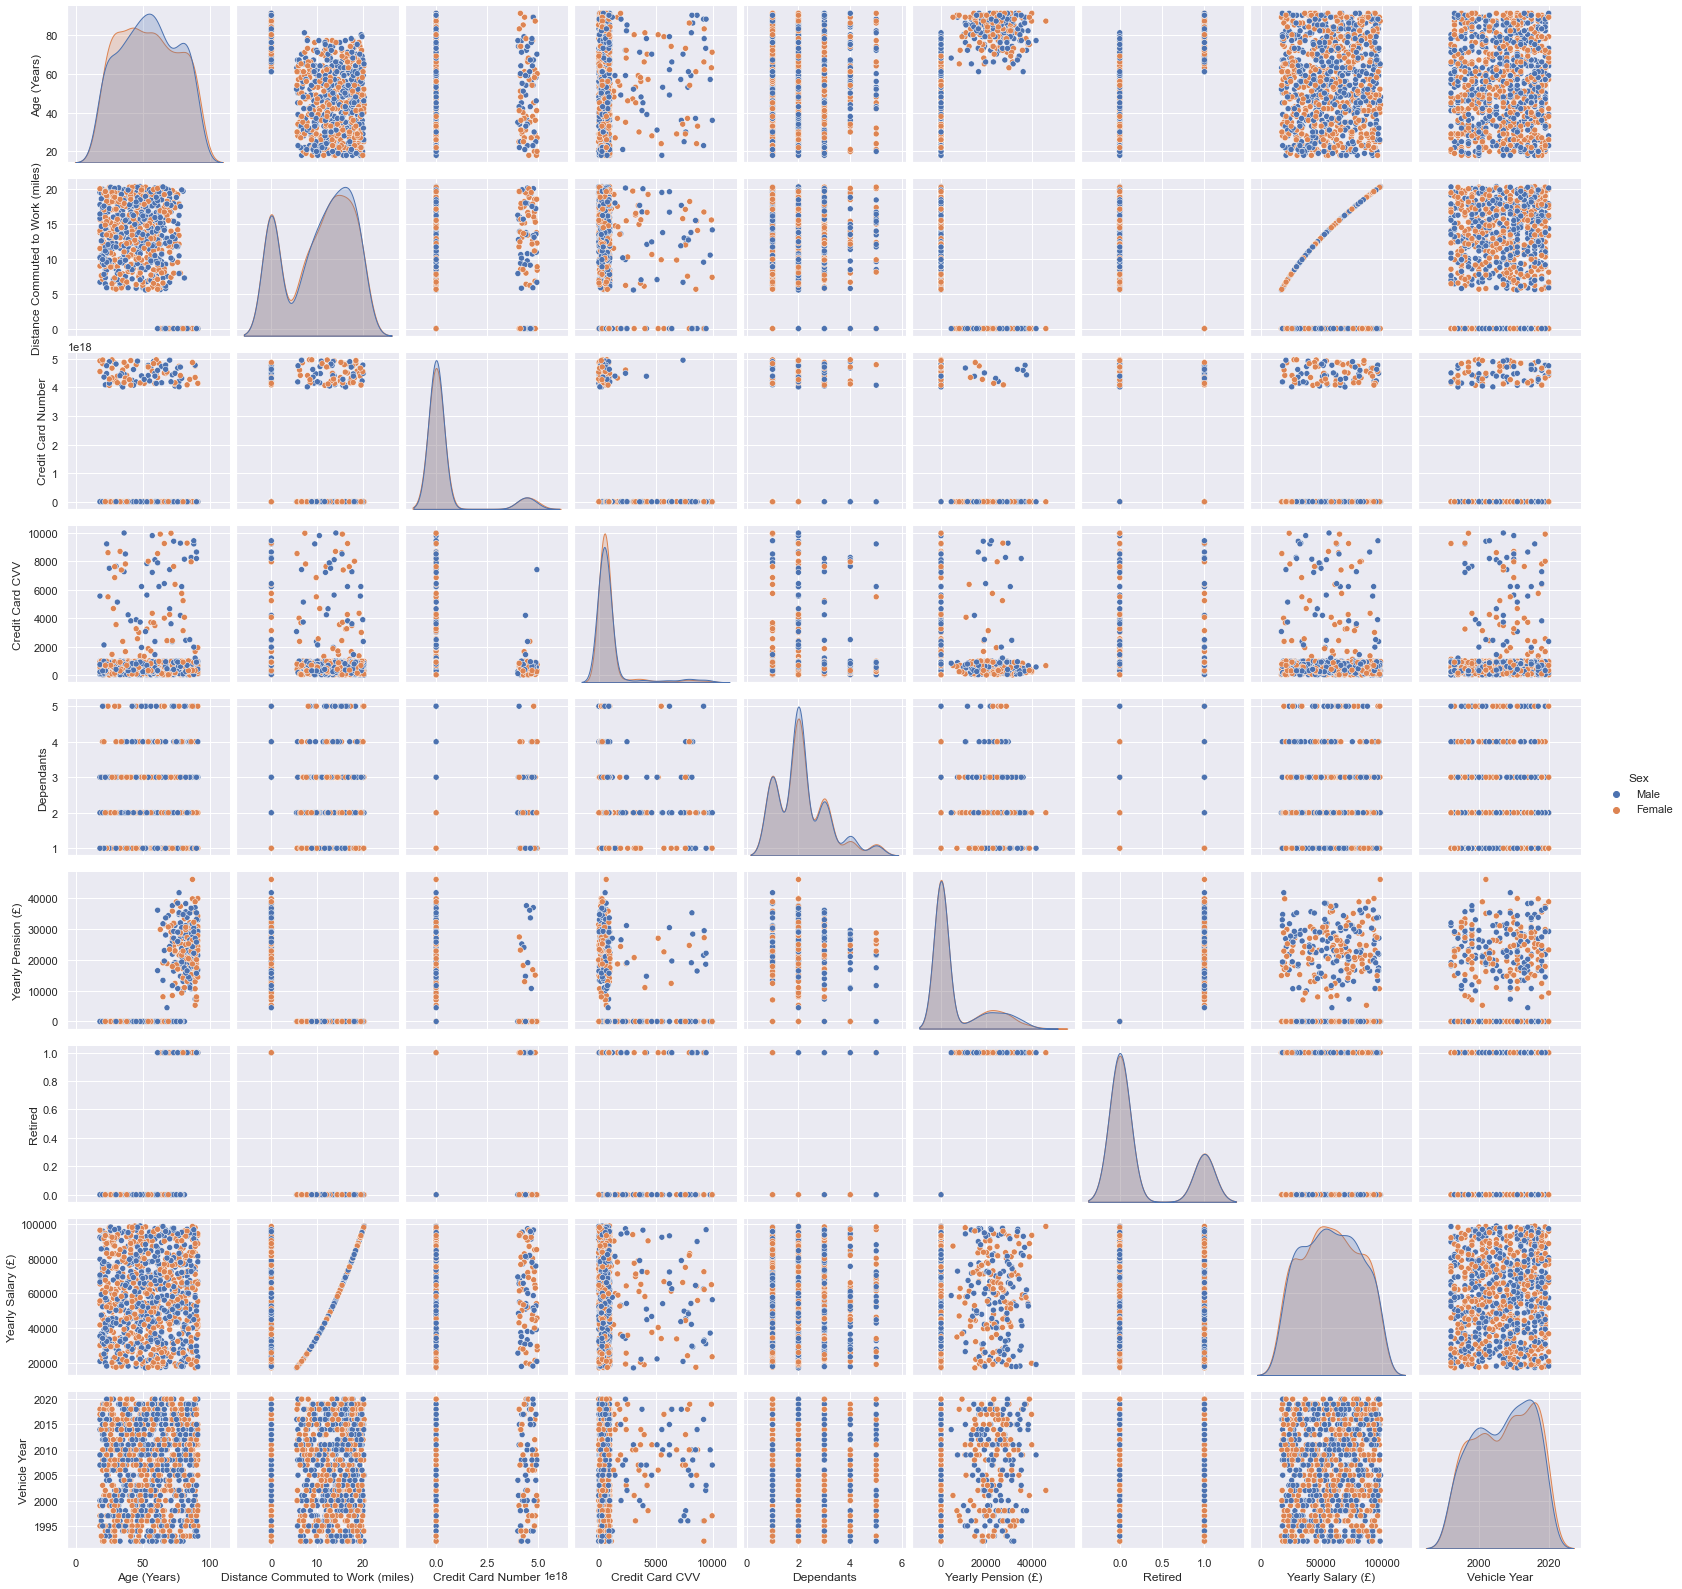

In [175]:
sns.pairplot(customer_data, hue="Sex", height=2.5)

## 1.

In [176]:
salary_age = customer_data[['Yearly Salary (£)', 'Age (Years)']]
salary_age.head()

Yearly Salary (£)  Age (Years)
0              72838           89
1              54016           46
2              68049           22
3              91337           56
4              18446           57

In [177]:
customer_data.isnull().sum()

Address Street                         0
Address City                           0
Address Postcode                       0
Age (Years)                            0
Distance Commuted to Work (miles)      0
Employer Company                     246
Credit Card Start Date                 0
Credit Card Expiry Date                0
Credit Card Number                     0
Credit Card CVV                        0
Dependants                            19
First Name                             0
Bank IBAN                              0
Last Name                              0
Marital Status                         0
Yearly Pension (£)                     0
Retired                                0
Yearly Salary (£)                      0
Sex                                    0
Vehicle Make                           0
Vehicle Model                          0
Vehicle Year                           0
Vehicle Type                           0
dtype: int64

    a. Mean

In [178]:
mean_Salary = salary_age['Yearly Salary (£)'].mean()
mean

NameError: name 'mean' is not defined

    b. Median

In [ ]:
median_age = round(salary_age['Age (Years)'].median())
median

## 2.

    Perform univariate plots of the following data attributes:
        a. Age, calculating how many bins would be required for a bin_width of 5.
        b. Dependents, fixing data errors with seaborn itself.
        c. Age (of default bins), conditioned on Marital Status.

    A. Age, calculating how many bins would be required for a bin_width of 5.

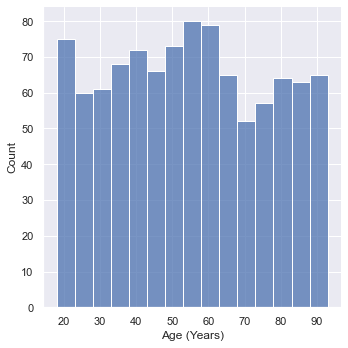

In [199]:
# By default, displot()/histplot() choose a default bin size 
# based on the variance of the data and the number of observations
sns.displot(customer_data, x = 'Age (Years)', bins = 15,  binwidth = 5)

    B. Dependants, fixing Data Errors with Seaborn

In [200]:
# Replacing nan values in Dependants with integer 0

Dependants = customer_data["Dependants"].fillna(0, inplace=True)
Dependants

In [201]:
 # This line is to show that NaN is no longer present in the Dependants data
    
Dependants = customer_data["Dependants"].isnull().sum
Dependants

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: Dependants, Length: 1000, dtype: bool>

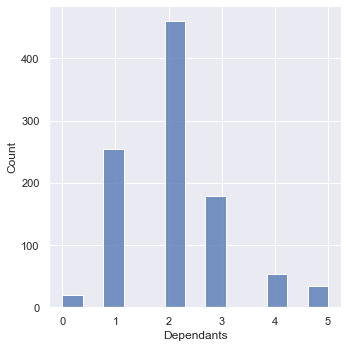

In [229]:
sns.displot(customer_data, x = 'Dependants')

    c. Age (of default bins), conditioned on Marital Status

Text(0.5, 1.0, 'Age Conditioned on Marital Status')

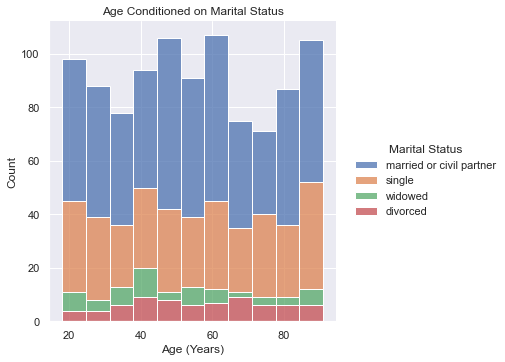

In [183]:
sns.displot(customer_data, x = 'Age (Years)', multiple = 'stack', hue = 'Marital Status')
plt.title("Age Conditioned on Marital Status")

## 3.  

    Perform multivariate plots with the following data attributes:
        a. Commuted distance against salary.
        b. Age against Salary
        c. Age against Salary conditioned by Dependants

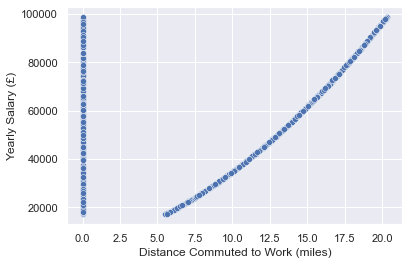

In [179]:
# Commuted distance against salary.

sns.scatterplot(x='Distance Commuted to Work (miles)', y='Yearly Salary (£)', data=customer_data);

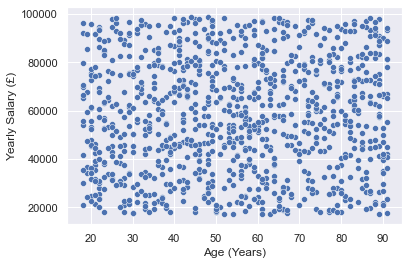

In [206]:
#Age against Salary

g = sns.scatterplot(x="Age (Years)", y="Yearly Salary (£)", data=customer_data);

Text(0.5, 1.0, 'Age against Salary conditioned by Dependants')

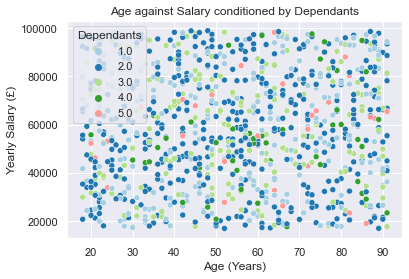

In [180]:
# Age against Salary conditioned by Dependants

sns.scatterplot(data=customer_data, x='Age (Years)', y='Yearly Salary (£)', hue='Dependants', palette=('Paired'), legend='full')
plt.title("Age against Salary conditioned by Dependants")

## 4. Saving Plots

<class 'seaborn.axisgrid.FacetGrid'>
<class 'seaborn.axisgrid.FacetGrid'>
<class 'seaborn.axisgrid.FacetGrid'>


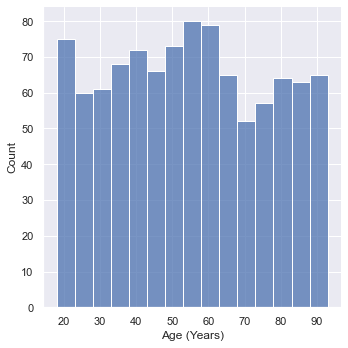

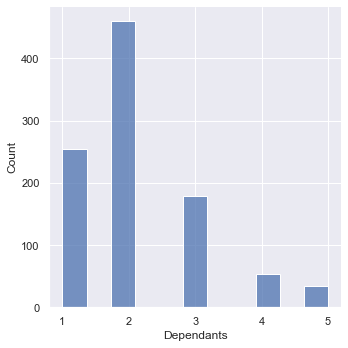

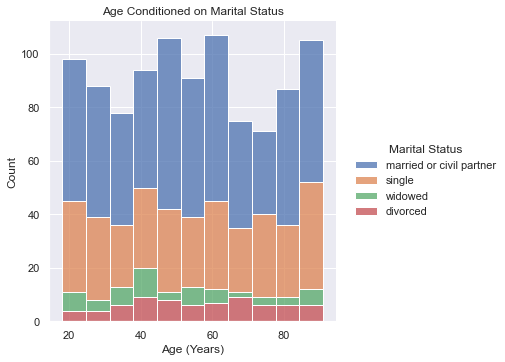

In [185]:
displot_h1 = sns.displot(customer_data, x = 'Age (Years)', bins = 15,  binwidth = 5)
displot_h2 = sns.displot(customer_data, x = 'Dependants')
displot_h3 = sns.displot(customer_data, x = 'Age (Years)', multiple = 'stack', hue = 'Marital Status') # Source: Waskom 2021
plt.title("Age Conditioned on Marital Status")



print( type(displot_h1) )
print( type(displot_h2) )
print( type(displot_h3) )

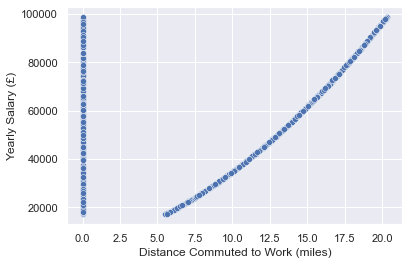

In [265]:
scatter_h1 = sns.scatterplot(x='Distance Commuted to Work (miles)', y='Yearly Salary (£)', data=customer_data)

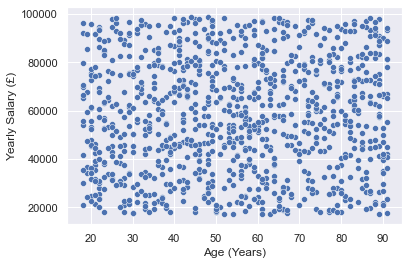

In [266]:
scatter_h2 = sns.scatterplot(x="Age (Years)", y="Yearly Salary (£)", data=customer_data)

Text(0.5, 1.0, 'Age against Salary conditioned by Dependants')

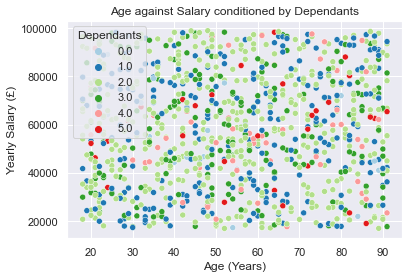

In [267]:
scatter_h3 = sns.scatterplot(data=customer_data, x='Age (Years)', y='Yearly Salary (£)', hue='Dependants', palette=('Paired'), legend='full')
plt.title("Age against Salary conditioned by Dependants")

In [186]:
displot_h1.savefig('./dis_plot1.png')
displot_h2.savefig('./dis_plot2.png')
displot_h3.savefig('./dis_plot3.png')

In [253]:
scatter_h1.get_figure().savefig('./scatter_plot1.png')
scatter_h2.get_figure().savefig('./scatter_plot2.png')
scatter_h3.get_figure().savefig('./scatter_plot3.png')

# Reference: 
* jjmontes (2016), How to overcome datetime.datetime not json serializable-Python source code (version 3.0)- [Stackoverflow](https://stackoverflow.com/questions/11875770/how-to-overcome-datetime-datetime-not-json-serializable/36142844#36142844)<br>

* Python Software Foundation, (2021), CSV Modules to open and write files - Python source code (version 3.0)-[Python CSV Documentation](https://docs.python.org/3/library/csv.html)<br>
* Waskom (2021), Univariate Seaborn Displot- Seaborn (version 0.11.2)-[Seaborn Documentation](https://seaborn.pydata.org/generated/seaborn.displot.html)<br>
* JSONata.org (2021), JSON documentation on handling datetime- JSONata(version 1.8.0)- [JSON Documentation](https://docs.jsonata.org/date-time)
* Tompsett B(2021), Introduction to Programming for Artificial Intelligence(Python)-University of Hull - [Lecture Notes](https://canvas.hull.ac.uk/courses/61141)